<a href="https://colab.research.google.com/github/Pradeep1070/clustering-wheat-kernals/blob/main/clustering_wheat_kernals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.5 MB/s eta 0:00:00


In [5]:
seeds_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MSc/ADM/clustering assignment/seeds_dataset.txt', sep='\t', names=['col'+str(i) for i in range(1,9)])
target_clusters = seeds_df.iloc[:, -1]
seeds_df.drop(seeds_df.columns[-1], axis=1, inplace=True)

In [ ]:
k_range = list(range(2,11))
within_cluster_var_kmn=[]
sil_scores_kmn=[]
purities_kmn = []

for k in k_range:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(seeds_df)

  within_cluster_var_kmn.append(kmeans.inertia_)
  sil_scores_kmn.append(silhouette_score(seeds_df, kmeans.labels_))

  conf_matrix = confusion_matrix(target_clusters, kmeans.labels_)
  purity = np.sum(np.max(conf_matrix, axis=0)) / np.sum(conf_matrix)
  purities_kmn.append(purity)

In [7]:
within_cluster_var_kmd = []
sil_scores_kmd = []
purities_kmd = []

for k in k_range:
  kmedoids = KMedoids(n_clusters=k, method='pam')
  kmedoids.fit(seeds_df)

  within_cluster_var_kmd.append(kmedoids.inertia_)
  sil_scores_kmd.append(silhouette_score(seeds_df, kmedoids.labels_))

  conf_matrix = confusion_matrix(target_clusters, kmedoids.labels_)
  purity = np.sum(np.max(conf_matrix, axis=0)) / np.sum(conf_matrix)
  purities_kmd.append(purity)

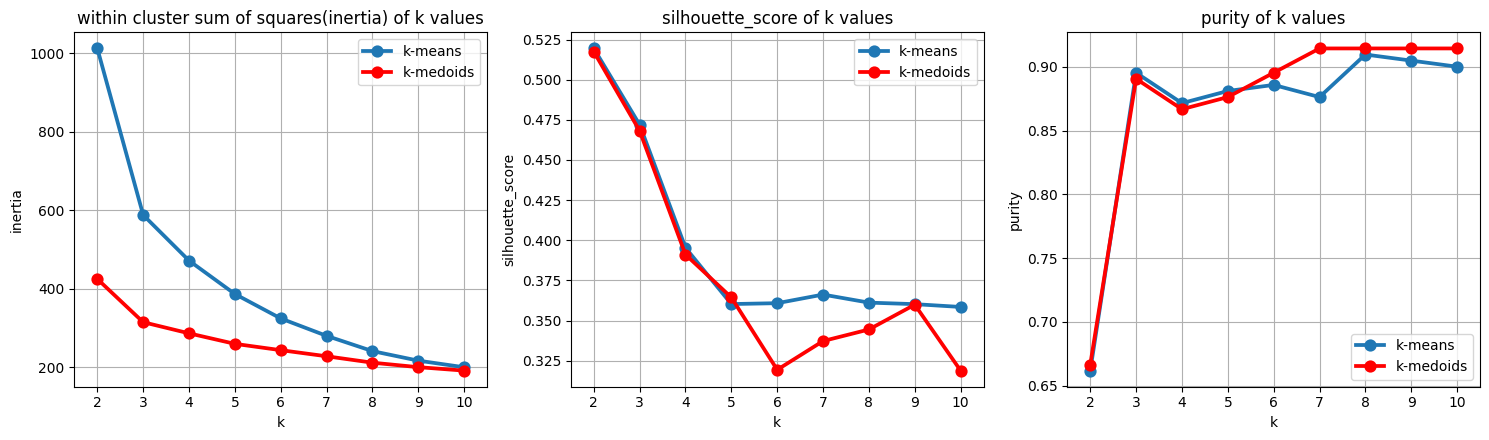

In [8]:
fg, ax = plt.subplots(1,3,figsize=(15,4.5))

sns.pointplot(y=within_cluster_var_kmn, x=k_range, label='k-means', ax=ax[0])
sns.pointplot(y=within_cluster_var_kmd, x=k_range, label='k-medoids', ax=ax[0], color='red')
ax[0].set_ylabel('inertia')
ax[0].set_xlabel('k')
ax[0].set_title('within cluster sum of squares(inertia) of k values')
ax[0].legend()
ax[0].grid()

sns.pointplot(y=sil_scores_kmn, x=k_range, label='k-means', ax=ax[1])
sns.pointplot(y=sil_scores_kmd, x=k_range, label='k-medoids', ax=ax[1], color='red')
ax[1].set_ylabel('silhouette_score')
ax[1].set_xlabel('k')
ax[1].set_title('silhouette_score of k values')
ax[1].legend()
ax[1].grid()

sns.pointplot(y=purities_kmn, x=k_range, label='k-means', ax=ax[2])
sns.pointplot(y=purities_kmd, x=k_range, label='k-medoids', ax=ax[2], color='red')
ax[2].set_xlabel('k')
ax[2].set_ylabel('purity')
ax[2].set_title('purity of k values')
ax[2].legend()
ax[2].grid()

plt.tight_layout()
plt.show()

using the elbow method we can come to the conclusion that k = 3 is a better cluster separation

Silhoutte score gives the best insight for deciding the cluster - k=3

In [9]:
print('sil_scores_kmn\n',sil_scores_kmn)
print('sil_scores_kmd\n',sil_scores_kmd)
print('purities_kmn\n',purities_kmn)
print('purities_kmd\n',purities_kmd)
print('within_cluster_var_kmn\n',within_cluster_var_kmn)
print('within_cluster_var_kmd\n',within_cluster_var_kmd)

sil_scores_kmn
 [0.5194475653884404, 0.4719337319126887, 0.3953600261389669, 0.3602947701507399, 0.3608393831646539, 0.36620317609814323, 0.3611916044665045, 0.3602415108117383, 0.3584952248842902]
sil_scores_kmd
 [0.5174648339689686, 0.4681390800859686, 0.39111161672842504, 0.36441210031659516, 0.3193679365089266, 0.33726195419767, 0.3444710658946364, 0.3599170240546397, 0.31885346927385044]
purities_kmn
 [0.6619047619047619, 0.8952380952380953, 0.8714285714285714, 0.8809523809523809, 0.8857142857142857, 0.8761904761904762, 0.9095238095238095, 0.9047619047619048, 0.9]
purities_kmd
 [0.6666666666666666, 0.8904761904761904, 0.8666666666666667, 0.8761904761904762, 0.8952380952380953, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143]
within_cluster_var_kmn
 [1011.6122645866976, 587.318611594043, 471.0271456822111, 386.0116245037822, 323.8050936747493, 279.4322770591946, 240.57835433851957, 216.27464090404197, 199.4866299318326]
within_cluster_var_kmd
 [424.27